In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 



In [4]:
'''
Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
dataset have?
'''
df = pd.read_excel('flight_price.xlsx')
df.shape

(10683, 11)

# It has 10683 rows and 11 columns 

In [7]:
'''
Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.
'''
df.describe()


,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### here the only price column is in the float format all the other are in string format 

(array([6.029e+03, 4.390e+03, 1.820e+02, 6.600e+01, 7.000e+00, 1.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1759. ,  9534.3, 17309.6, 25084.9, 32860.2, 40635.5, 48410.8,
        56186.1, 63961.4, 71736.7, 79512. ]),
 <BarContainer object of 10 artists>)

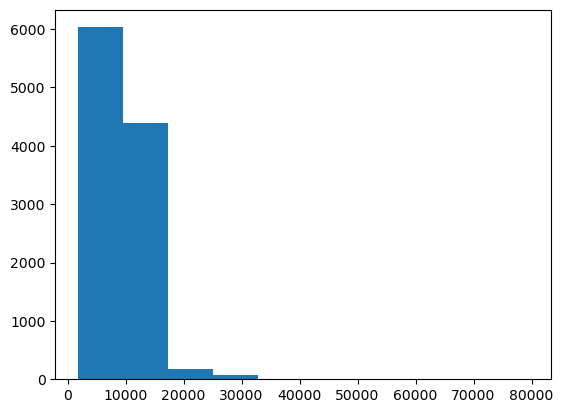

In [13]:
plt.hist(df['Price'])

In [14]:
'''
Q3. What is the range of prices in the dataset? What is the minimum and maximum price?
'''

# for see minimum and maximum prices in the dataset we use describe function 

df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### min price - 1759.00 
### max price - 79512.00 
### range of price is 1759.00 to 79512.00

<AxesSubplot: xlabel='Price', ylabel='Airline'>

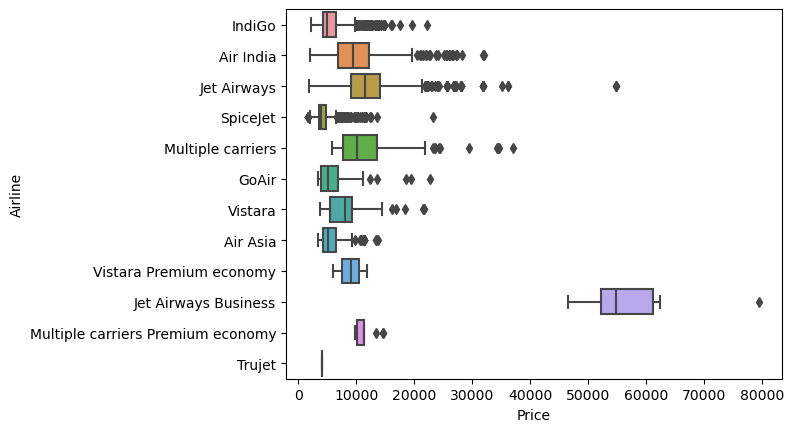

In [24]:
'''
Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines.
'''

sns.boxplot(data = df , x= df['Price'] , y =df['Airline'])

In [ ]:
'''
Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis
'''


### Yes there are outliers in the 

In [32]:

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]


In [35]:
print(df.describe()  - filtered_df.describe())


              Price
count     94.000000
mean     189.402396
std      542.238872
min        0.000000
25%       49.000000
50%       17.000000
75%       61.000000
max    56511.000000


### that much of difference is  genreted because of the outlier 

In [38]:
'''
Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss?
'''
# WE  have to find the peak season then we do this in the month manner 
df['date'] = df['Date_of_Journey'].str.split('/').str[0]
df['month']=df['Date_of_Journey'].str.split('/').str[1]
df['year']=df['Date_of_Journey'].str.split('/').str[2]

In [39]:
df['date'] = df['date'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)

In [44]:
df['month'].unique()

array([3, 5, 6, 4])

In [45]:
df['month'].max()

6

### peak travel season of the fligth  6th month means in the June month

<BarContainer object of 10683 artists>

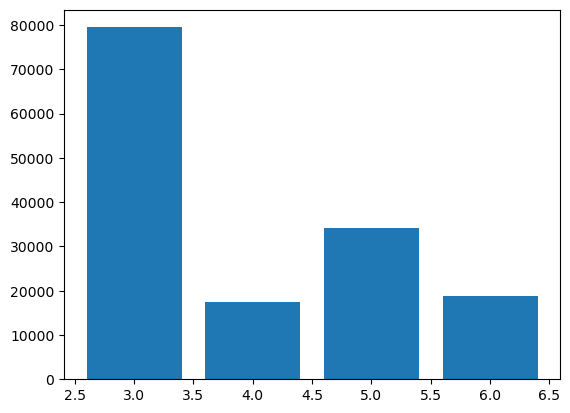

In [51]:
'''
Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
Price dataset to identify any trends in flight prices. What features would you analyze to identify these
trends, and what visualizations would you use to present your findings to your team?
'''

# to find the key feature releted to the flight price 

plt.bar(df['month'] , df['Price'])

# key features :
### 1.from this we see that there is high price of flights in the 3rd month means in the march month 
### 2.as per the stopes increases the price of the flight are also increases
### 3. as per the duratio of flight increase the price of the flight are also increase.

In [ ]:
'''
Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team?
'''


In [55]:
df['duration_hour'] = df['Duration'].str.split('h').str[0]
#df['duration_hour'] = df['duration_hour'].astype(int)

In [74]:
df['duration_hour'] = df['duration_hour'].replace('' , '1')

In [75]:
df['duration_hour'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '41', '40'], dtype=object)

In [76]:
df['duration_hour'] = df['duration_hour'].astype(int)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  date             10683 non-null  int64 
 12  month            10683 non-null  int64 
 13  year             10683 non-null  int64 
 14  duration_hour    10683 non-null  int64 
dtypes: int64(5), object(10)
memory usage: 1.2+ MB


In [80]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [81]:
df['Total_Stops']  = df['Total_Stops'].map({'non-stop':0 , '2 stops':2 , '1 stop':1 , '3 stops':3 , '4 stops':4 , np.nan:1})

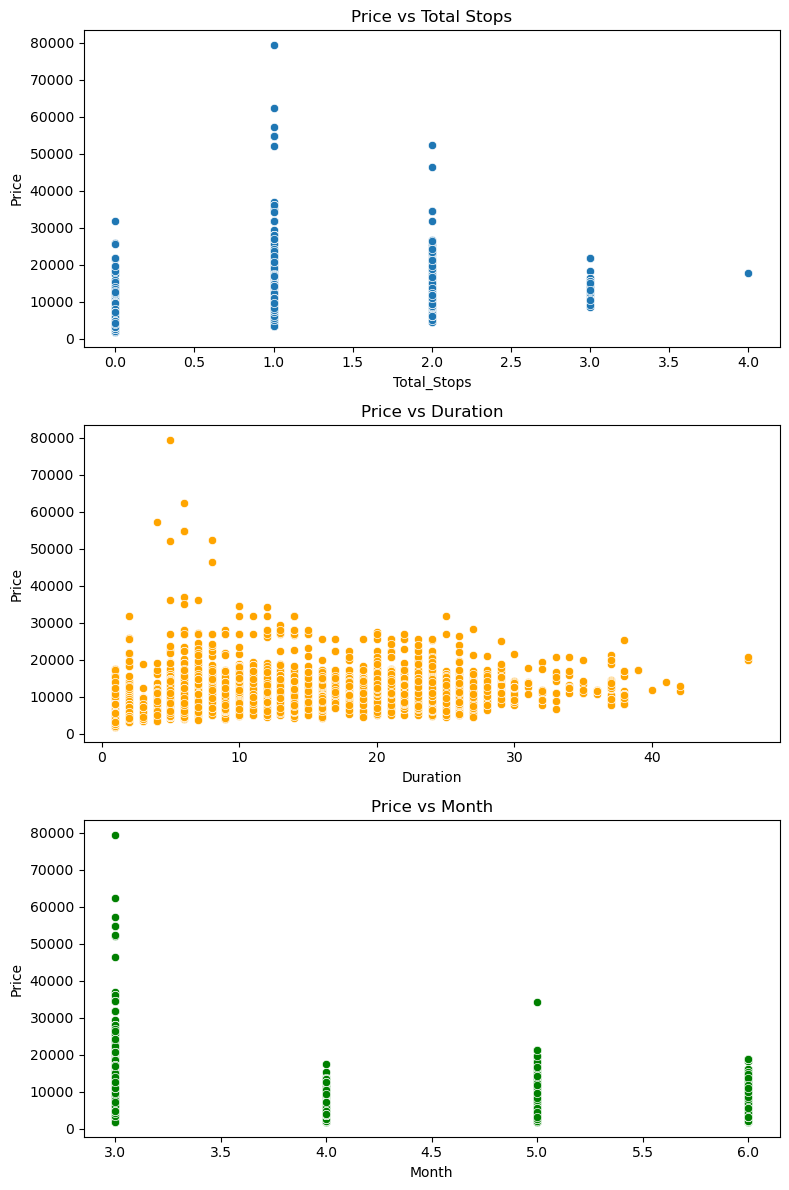

In [90]:
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Plot price vs total_stops
sns.scatterplot(x=df['Total_Stops'], y=df['Price'], data=df, ax=axs[0])
axs[0].set_title('Price vs Total Stops')
axs[0].set_xlabel('Total_Stops')
axs[0].set_ylabel('Price')

# Plot price vs duration
sns.scatterplot(x=df['duration_hour'], y=df['Price'], data=df, ax=axs[1], color='orange')
axs[1].set_title('Price vs Duration')
axs[1].set_xlabel('Duration')
axs[1].set_ylabel('Price')

# Plot price vs month
sns.scatterplot(x=df['month'], y=df['Price'], data=df, ax=axs[2], color='green')
axs[2].set_title('Price vs Month')
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Price')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

# Google play Store data 

In [ ]:
Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?
Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
app categories.
Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis.
Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.
Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.
Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs.
Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?


Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
most successful app developers. What features would you analyze to make recommendations to the
company, and what data visualizations would you use to present your findings?
Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
launch a new app. What features would you analyze to make recommendations to the company, and
what data visualizations would you use to present your findings?

